# Comparison of machine learning models
This notebook contains the code for visualizing a bar plot of the model performances (as determined by $R^2$ and MAE). These statistics were taken from the mean of 100 training-testing splits using the baseline SardiNIA study.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import pearsonr
import pandas as pd
import glob as gb
import csv

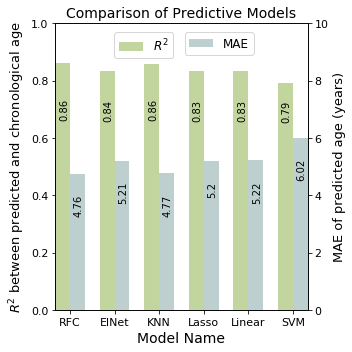

In [2]:
model_names = ['RFC', 'ElNet', 'KNN', 'Lasso', 'Linear', 'SVM']#, 'XGBoost']
#model_names = ['Random Forest', 'K-Nearest', 'Elastic Net', 'Lasso', 'Linear', 'SVM']#, 'XGBoost']
model_R2 = [0.8630, 0.8352, 0.8585, 0.8350, 0.8348, 0.7905]#, 0.8603]
model_MAE = [4.758, 5.208, 4.7677, 5.2013, 5.2158, 6.0155]#, 4.7102] # from 100 splits
ax = pl.figure(figsize=(5,5)).gca()
ax2 = ax.twinx()
bar1 = ax.bar(np.arange(len(model_names))*1.5, model_R2, color='#86AC41', align='center', alpha=0.5, width=0.5, label='$R^2$')
bar2 = ax2.bar(np.arange(len(model_names))*1.5+0.5, model_MAE, color='#7DA3A1', align='center', alpha=0.5, width=0.5, label='MAE')
model_R2 = [ round(elem, 2) for elem in model_R2 ]
for a,b in zip(np.arange(len(model_names))*1.5, model_R2):
    pl.text(a-0.12, b+6.25, str(b), size=10, rotation=90)
model_MAE = [ round(elem, 2) for elem in model_MAE ]
for a,b in zip(np.arange(len(model_names))*1.5, model_MAE):
    pl.text(a+0.38, b-1, str(b), size=10, rotation=90)
pl.xticks(np.arange(len(model_names))*1.5+0.25, model_names, rotation=90)
ax.set_xlabel ('Model Name', fontsize=14)
ax.set_ylabel ('$R^2$ between predicted and chronological age', fontsize=13)
ax.set_ylim(0,1)
ax2.set_ylabel ('MAE of predicted age (years)', fontsize=13)
ax2.set_ylim(0,10)
ax.set_title ('Comparison of Predictive Models', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
ax2.tick_params(axis='both', which='major', labelsize=11)
ax2.tick_params(axis='both', which='minor', labelsize=11)
pl.xlim(np.min(np.arange(len(model_names))*1.5)-0.25, np.max(np.arange(len(model_names))*1.5)+0.75)
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.55), fontsize=12)
#ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.45), fontsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.35, 0.99), fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.65, 0.99), fontsize=12)
pl.tight_layout()
#pl.axis([-1, len(model_names)+1, 0, 1])
pl.savefig('./Figures/model_comparison_bar_noXG.png', dpi=800, bbox_inches='tight')
pl.show()

## Correlation plot of PARs computed by different models

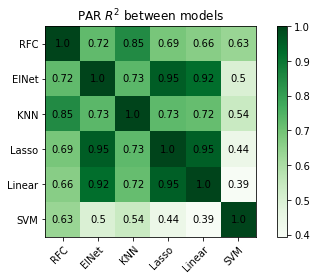

In [3]:
# read in models and PAR values
model_list = ['RFC', 'ElNet', 'KNN', 'Lasso', 'Linear', 'SVM']
num_models = len(model_list)
model_fn = ['RFc-Fsr79-b5s12t120-normal-s100','eln-Fsr79-b5s12t120-sardinia-s100',
            'KNNr-Fsr79-b5s12t120-normal-s100','lasso-Fsr79-b5s12t120-normal-s100',
            'linreg-Fsr79-b5s12t120-normal-s100','SVR-Fsr39-b5s12t120-normal-s100']

model_pars = []
model_ids = []
for model in model_fn:
    filepath = './Results/various_models/all/'+model+'.tsv'
    fi = np.genfromtxt(filepath,delimiter='\t')
    model_pars.append(fi[:,3])
    model_ids.append(fi[:,0])

# compute R2 values between PARs
overlap_matrix = np.ones((num_models,num_models))
for i in range(num_models):
    for j in range(num_models):
        par1 = []
        par2 = []
        for idx, iid in enumerate(model_ids[i]):
            if iid in model_ids[j]:
                idx2 = np.where(model_ids[j] == iid)
                par1.append(float(model_pars[i][idx]))
                par2.append(float(model_pars[j][idx2]))
        r, p = pearsonr(np.array(par1),np.array(par2))
        overlap_matrix[i,j] = r**2

# Make plot
fig, ax = pl.subplots()
im = ax.imshow(overlap_matrix,cmap='Greens',interpolation='none')
fig.colorbar(im, orientation='vertical')
ax.set_xticks(np.arange(num_models))
ax.set_yticks(np.arange(num_models))
ax.set_xticklabels(model_list)
ax.set_yticklabels(model_list)

# Rotate the tick labels and set their alignment.
pl.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(num_models):
    for j in range(num_models):
        text = ax.text(j, i, round(overlap_matrix[i, j],2),
                       ha="center", va="center", color="k")
ax.set_title(r"PAR $R^2$ between models")
fig.tight_layout()
pl.savefig('./Figures/model_correlation_tileplot_s100.png', dpi=800)
pl.show()